In [61]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [62]:
df2015=pd.read_csv('file:///F:/murder%20data/murder_2015_final.csv')
df2015

,city,state,2014_murders,2015_murders,change,murders_2020
0,Baltimore,Maryland,211,344,133,0
1,Chicago,Illinois,411,478,67,0
2,Houston,Texas,242,303,61,0
3,Cleveland,Ohio,63,120,57,0
4,Washington,D.C.,105,162,57,0
...,...,...,...,...,...,...
78,San Antonio,Texas,103,94,-9,0
79,Corpus Christi,Texas,27,17,-10,0
80,Pittsburgh,Pennsylvania,69,57,-12,0
81,Boston,Massachusetts,53,38,-15,0


In [63]:
df2016=pd.read_csv('file:///F:/murder%20data/murder_2016_prelim.csv')
df2016

,city,state,2015_murders,2016_murders,change,source,as_of
0,Chicago,Illinois,378,536,158,https://portal.chicagopolice.org/portal/page/p...,10/2/2016
1,Orlando,Florida,19,73,54,OPD,9/22/2016
2,Memphis,Tennessee,114,158,44,MPD,9/11/2016
3,Phoenix,Arizona,72,111,39,PPD,8/31/2016
4,Las Vegas,Nevada,90,125,35,http://www.lvmpd.com/Sections/Homicide/Homicid...,9/28/2016
...,...,...,...,...,...,...,...
74,New York,New York,266,252,-14,https://compstat.nypdonline.org/,9/25/2016
75,Omaha,Nebraska,34,20,-14,http://dataomaha.com/homicides,9/5/2016
76,Miami,Florida,62,45,-17,MPD,9/21/2016
77,Baltimore,Maryland,249,230,-19,https://data.baltimorecity.gov/Public-Safety/S...,10/1/2016


In [64]:
df2015.shape

(83, 6)

In [65]:
df2016.shape

(79, 7)

In [66]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          83 non-null     object
 1   state         83 non-null     object
 2   2014_murders  83 non-null     int64 
 3   2015_murders  83 non-null     int64 
 4   change        83 non-null     int64 
 5   murders_2020  83 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.0+ KB


In [67]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          79 non-null     object
 1   state         79 non-null     object
 2   2015_murders  79 non-null     int64 
 3   2016_murders  79 non-null     int64 
 4   change        79 non-null     int64 
 5   source        79 non-null     object
 6   as_of         79 non-null     object
dtypes: int64(3), object(4)
memory usage: 4.4+ KB


In [68]:
df2015.describe()

,2014_murders,2015_murders,change,murders_2020
count,83.000000,83.000000,83.000000,83.0
mean,65.746988,75.481928,9.734940,0.0
std,79.011244,91.684289,21.858795,0.0
min,0.000000,1.000000,-19.000000,0.0
25%,19.500000,22.500000,-3.000000,0.0
50%,32.000000,39.000000,4.000000,0.0
75%,82.000000,94.000000,14.000000,0.0
max,411.000000,478.000000,133.000000,0.0


In [69]:
df2016.describe()

,2015_murders,2016_murders,change
count,79.000000,79.000000,79.000000
mean,56.468354,62.379747,5.911392
std,70.158764,81.051472,21.962199
min,0.000000,1.000000,-21.000000
25%,13.000000,14.500000,-3.000000
50%,30.000000,30.000000,2.000000
75%,71.500000,81.500000,9.000000
max,378.000000,536.000000,158.000000


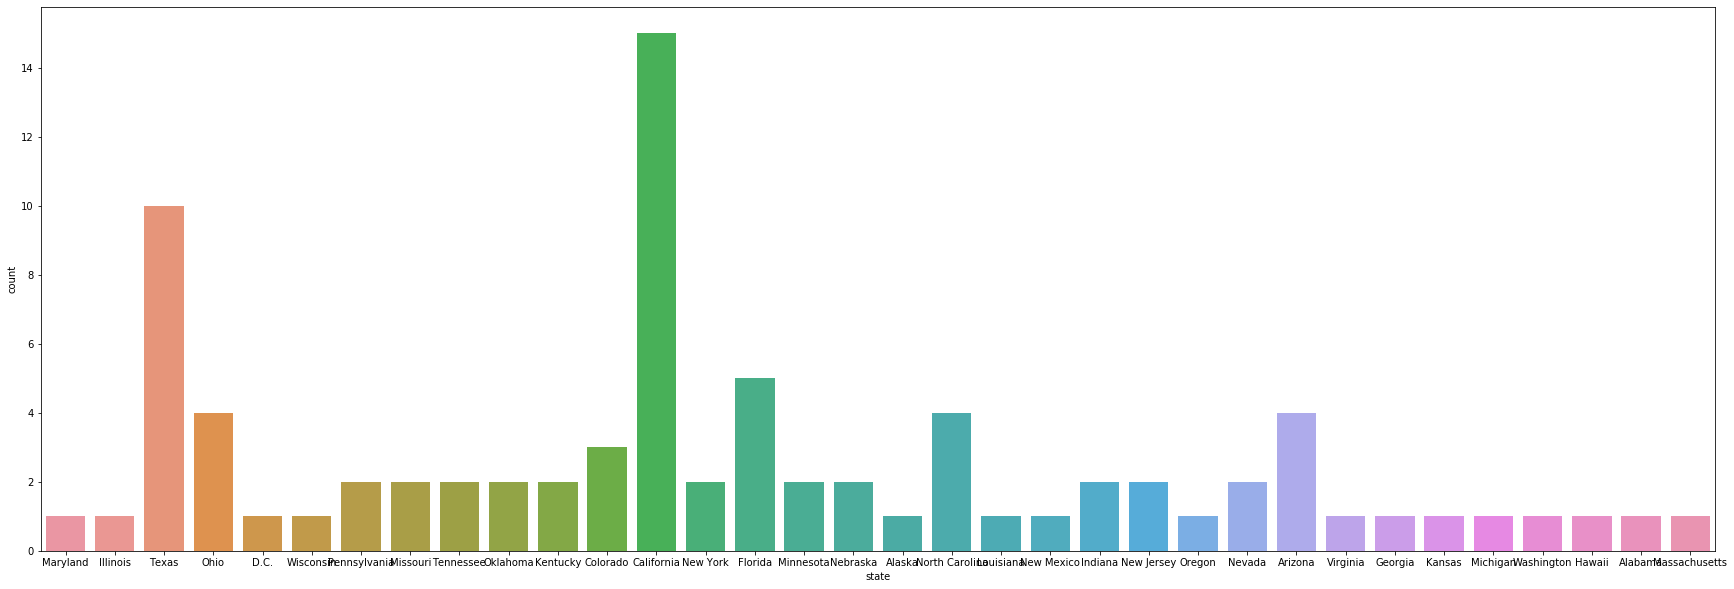

In [70]:
plt.figure(figsize=(30,10))
sns.countplot(df2015['state'])

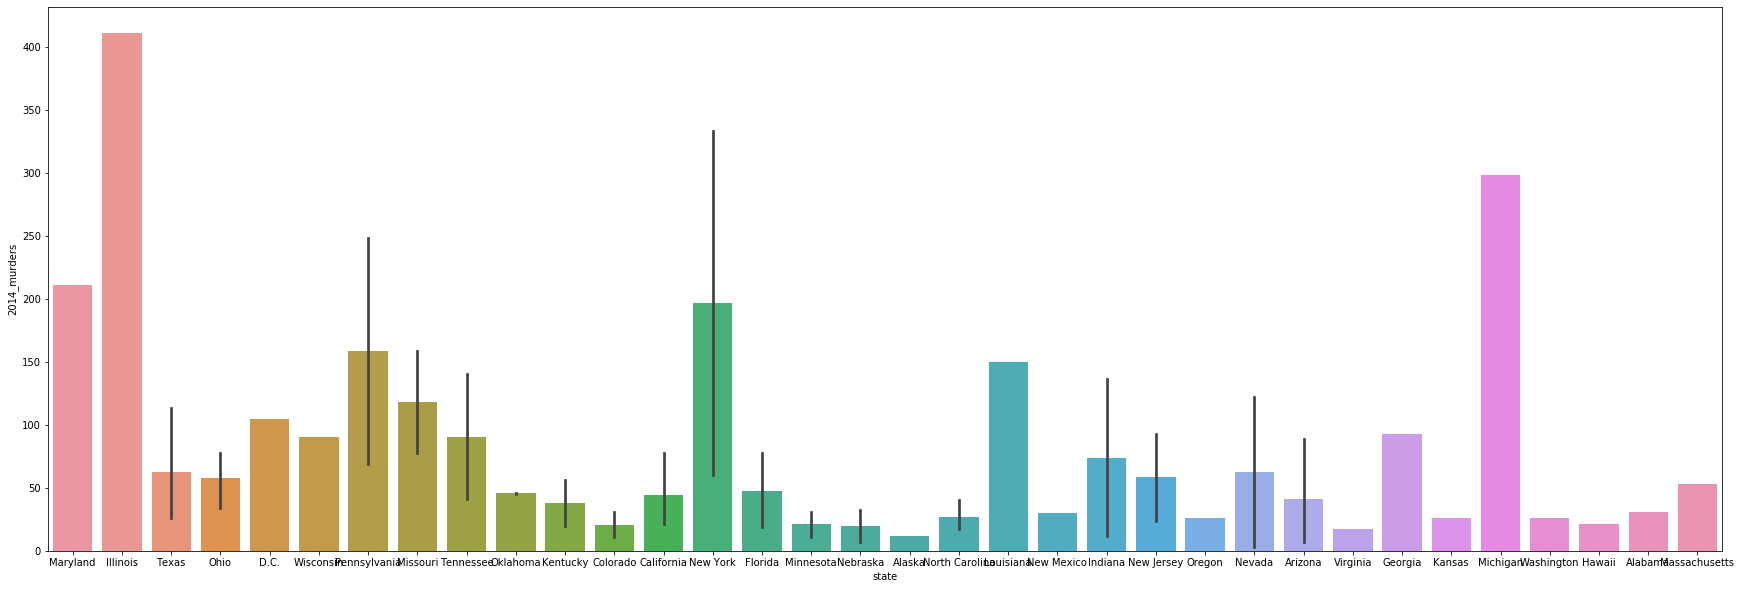

In [71]:
plt.figure(figsize=(30,10))
sns.barplot(x='state',y='2014_murders',data=df2015)

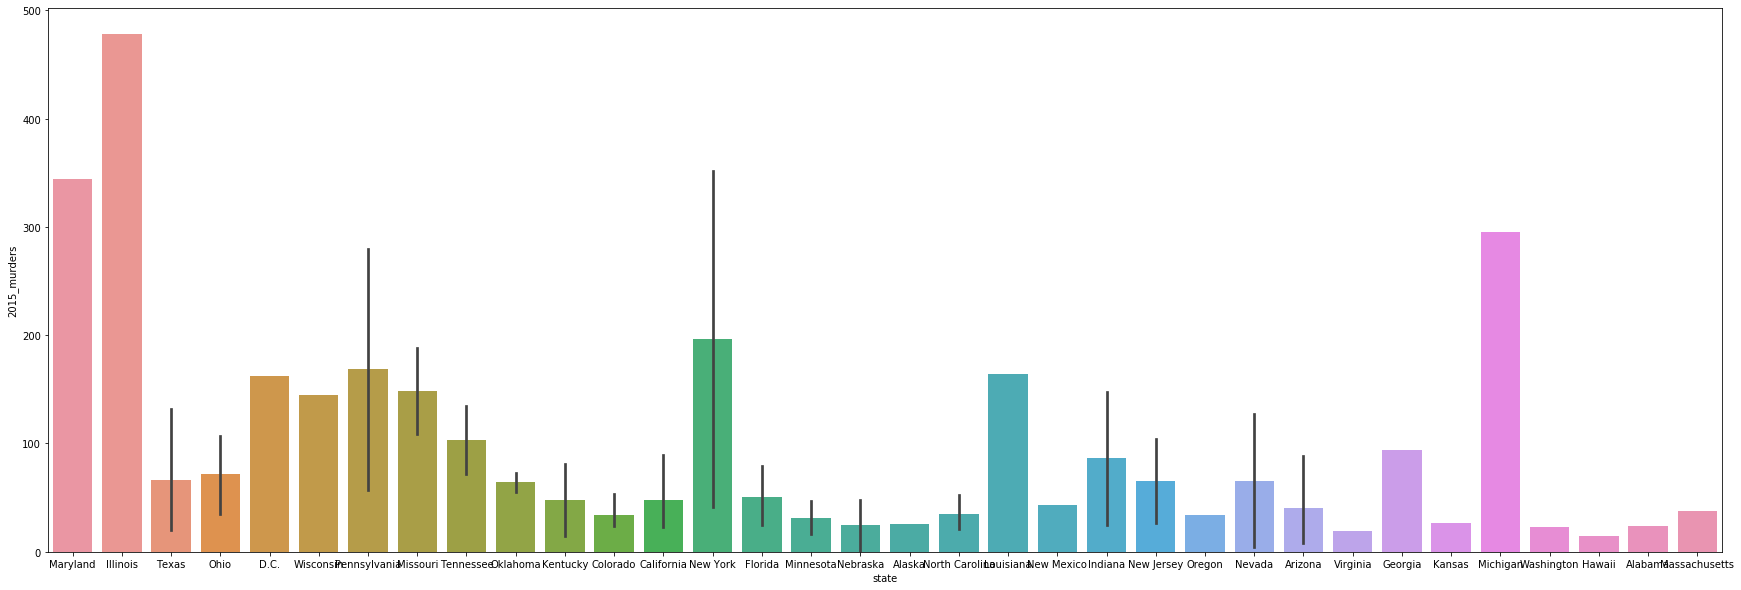

In [72]:
plt.figure(figsize=(30,10))
sns.barplot(x='state',y='2015_murders',data=df2015)

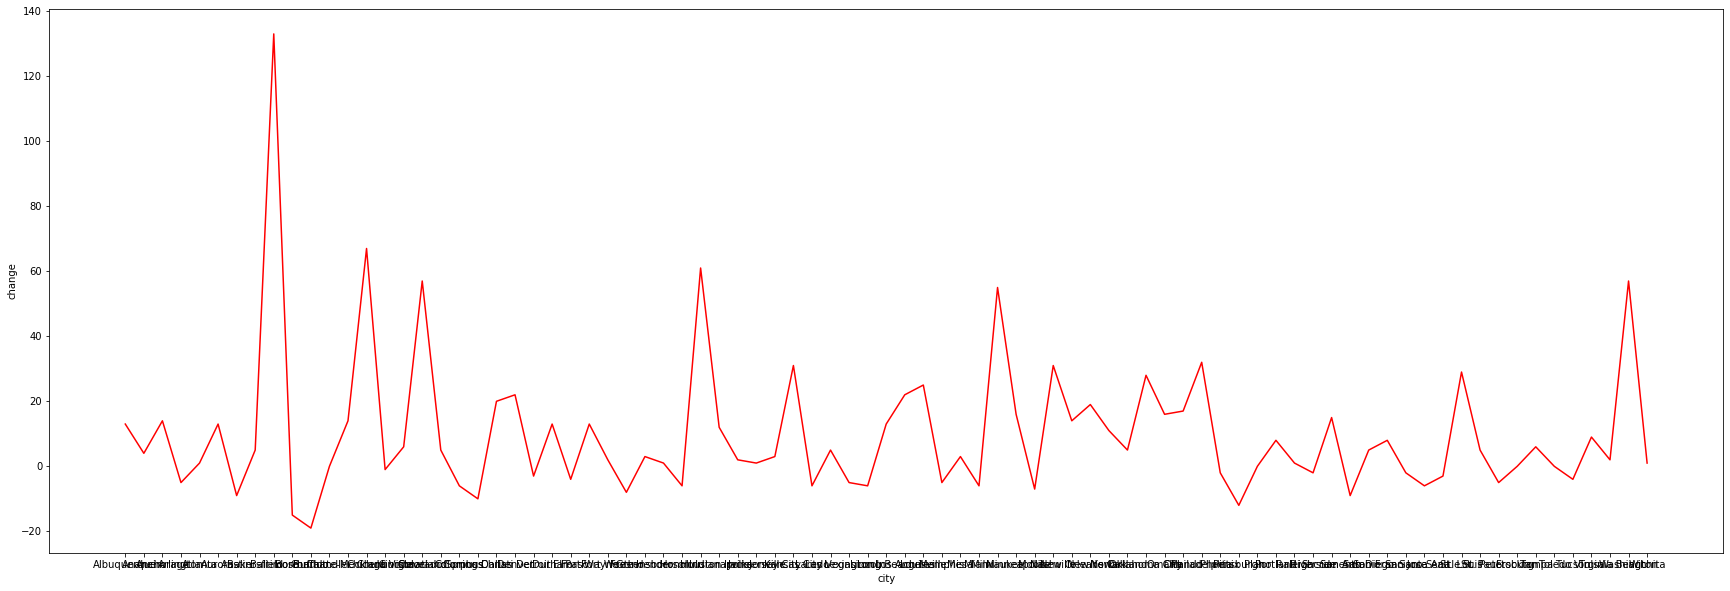

In [73]:
plt.figure(figsize=(30,10))
sns.lineplot(x='city',y='change',data=df2015,color='red')

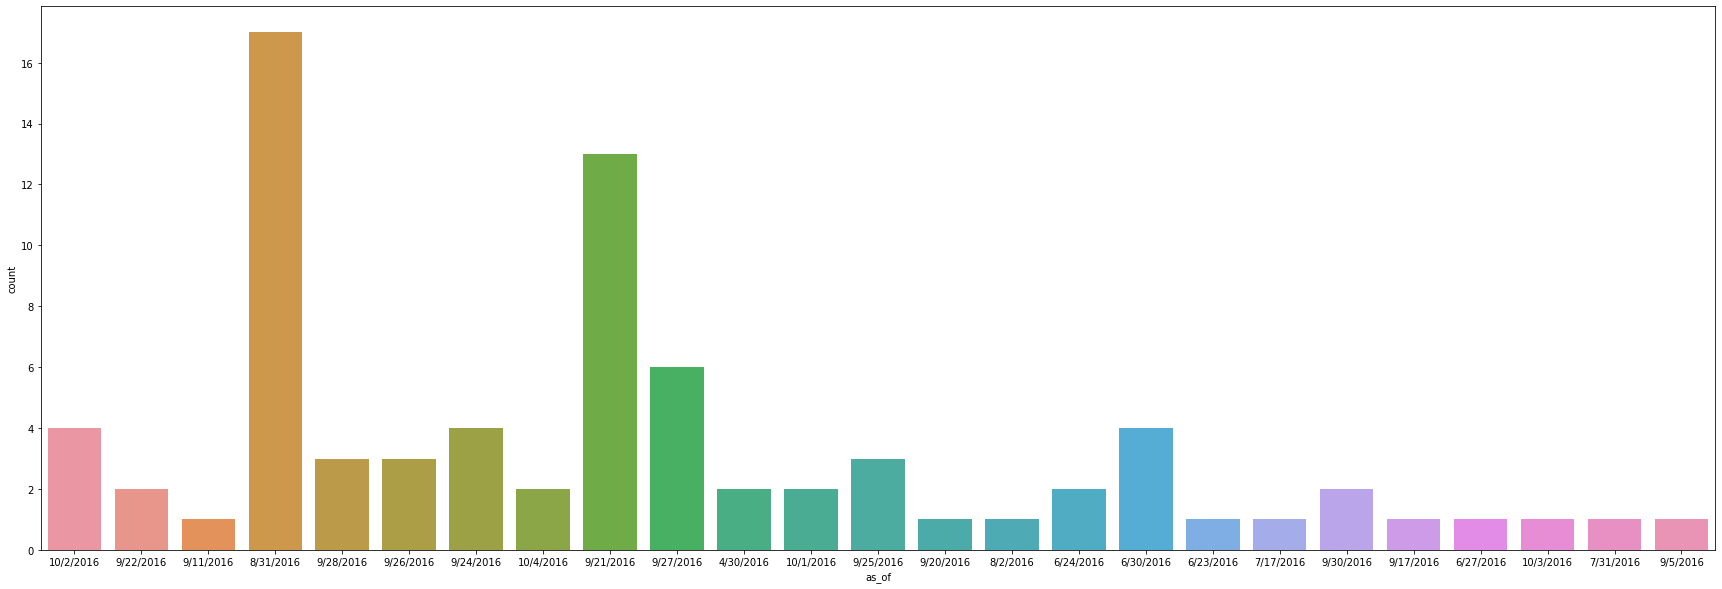

In [74]:
plt.figure(figsize=(30,10))
sns.countplot(df2016['as_of'])

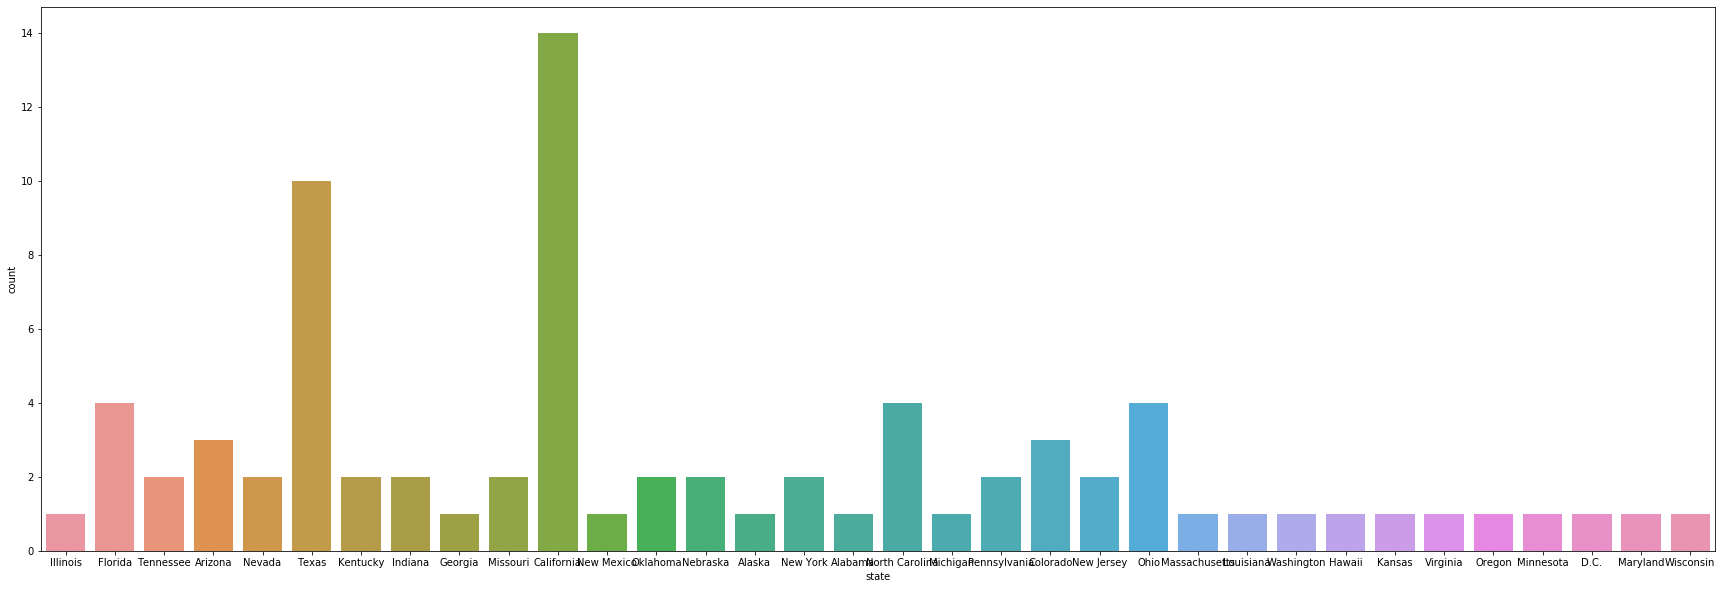

In [75]:
plt.figure(figsize=(30,10))
sns.countplot(df2016['state'])

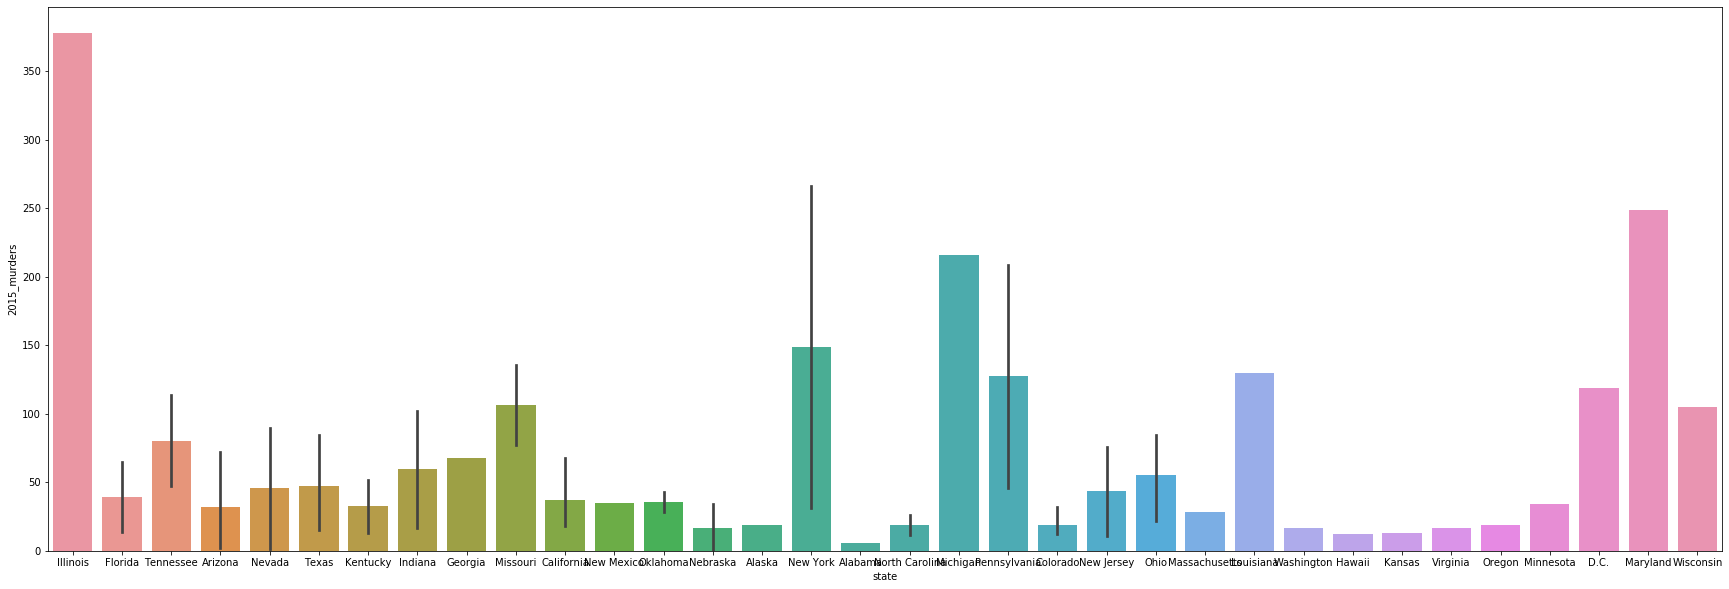

In [76]:
plt.figure(figsize=(30,10))
sns.barplot(x='state',y='2015_murders',data=df2016)

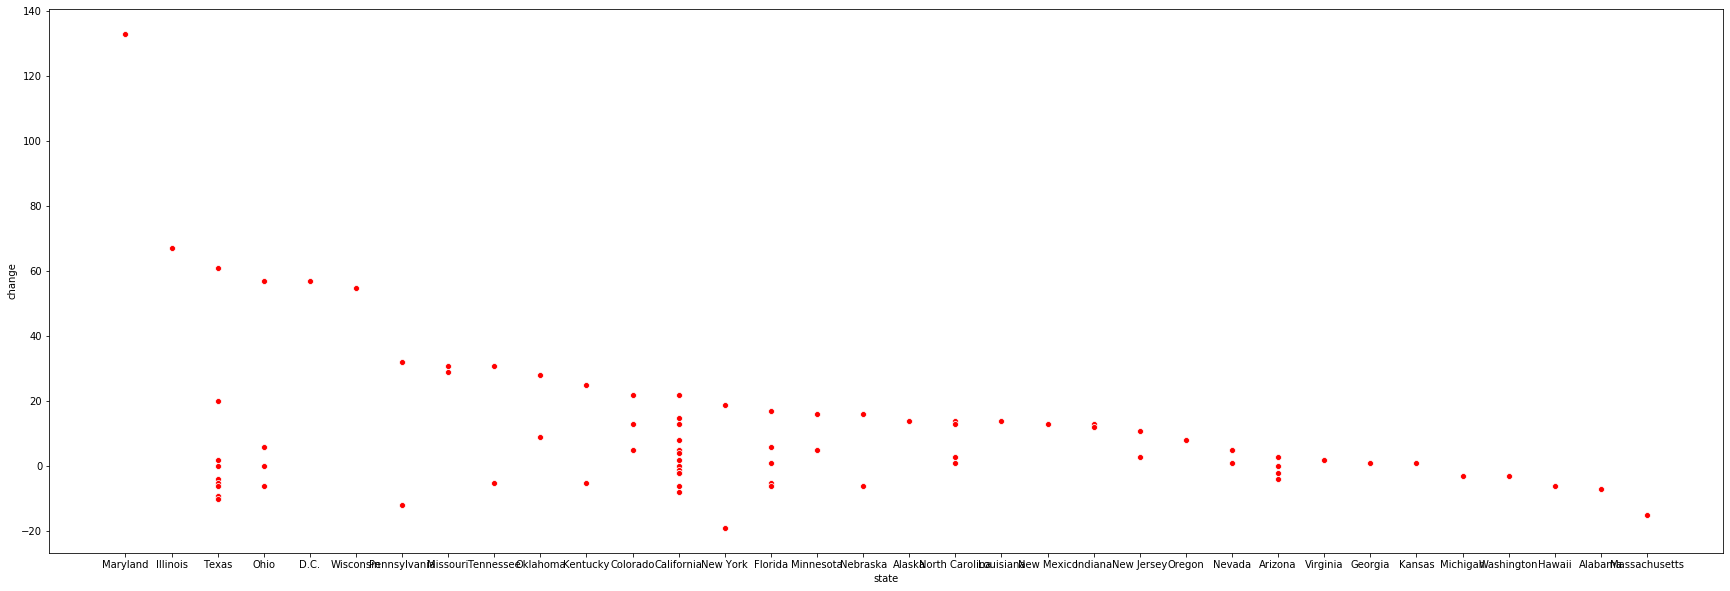

In [77]:
plt.figure(figsize=(30,10))
sns.scatterplot(df2015['state'],df2015['change'],color='red')

In [78]:
df2015

,city,state,2014_murders,2015_murders,change,murders_2020
0,Baltimore,Maryland,211,344,133,0
1,Chicago,Illinois,411,478,67,0
2,Houston,Texas,242,303,61,0
3,Cleveland,Ohio,63,120,57,0
4,Washington,D.C.,105,162,57,0
...,...,...,...,...,...,...
78,San Antonio,Texas,103,94,-9,0
79,Corpus Christi,Texas,27,17,-10,0
80,Pittsburgh,Pennsylvania,69,57,-12,0
81,Boston,Massachusetts,53,38,-15,0


In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le=LabelEncoder()

In [81]:
df2015['state']=le.fit_transform(df2015['state'])

In [82]:
df2015

,city,state,2014_murders,2015_murders,change,murders_2020
0,Baltimore,14,211,344,133,0
1,Chicago,9,411,478,67,0
2,Houston,30,242,303,61,0
3,Cleveland,25,63,120,57,0
4,Washington,5,105,162,57,0
...,...,...,...,...,...,...
78,San Antonio,30,103,94,-9,0
79,Corpus Christi,30,27,17,-10,0
80,Pittsburgh,28,69,57,-12,0
81,Boston,15,53,38,-15,0


In [84]:
x=df2015.state.values
y=df2015.murders_2020.values

In [89]:
x=x.reshape(-1,1)

In [90]:
y=y.reshape(-1,1)

In [91]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [92]:
xtrain.shape

(58, 1)

In [93]:
ytrain.shape

(58, 1)

In [94]:
li=LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
li.score(xtest,ytest)

1.0

In [96]:
li.fit(df2015[['state']],df2015.murders_2020)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
li.predict([[144]])

array([0.])

In [105]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
tre.score(xtest,ytest)

1.0

In [107]:
tre.fit(df2015[['state']],df2015.murders_2020)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
tre.predict([[144]])

array([0], dtype=int64)

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
rfc.score(xtest,ytest)

1.0

In [112]:
rfc.fit(df2015[['state']],df2015.murders_2020)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
rfc.predict([[144]])

array([0], dtype=int64)

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
mns=MinMaxScaler(feature_range=(0,1))
var=mns.fit_transform(x)

In [118]:
var

array([[0.42424242],
       [0.27272727],
       [0.90909091],
       [0.75757576],
       [0.15151515],
       [1.        ],
       [0.84848485],
       [0.54545455],
       [0.87878788],
       [0.54545455],
       [0.78787879],
       [0.36363636],
       [0.12121212],
       [0.09090909],
       [0.90909091],
       [0.6969697 ],
       [0.18181818],
       [0.51515152],
       [0.57575758],
       [0.09090909],
       [0.03030303],
       [0.72727273],
       [0.39393939],
       [0.66666667],
       [0.12121212],
       [0.3030303 ],
       [0.09090909],
       [0.72727273],
       [0.3030303 ],
       [0.63636364],
       [0.78787879],
       [0.81818182],
       [0.09090909],
       [0.75757576],
       [0.18181818],
       [0.09090909],
       [0.12121212],
       [0.60606061],
       [0.09090909],
       [0.09090909],
       [0.51515152],
       [0.09090909],
       [0.72727273],
       [0.63636364],
       [0.06060606],
       [0.90909091],
       [0.93939394],
       [0.090

In [119]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [121]:
mnb.score(xtest,ytest)

1.0

In [122]:
mnb.fit(df2015[['state']],df2015.murders_2020)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [124]:
mnb.predict([[144]])

array([0], dtype=int64)

In [125]:
from sklearn.naive_bayes import BernoulliNB

In [126]:
ber=BernoulliNB()
ber.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [127]:
ber.score(xtest,ytest)

1.0

In [128]:
from sklearn.svm import SVC

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rdf=RandomForestClassifier()
rdf.fit(xtrain,ytrain)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
rdf.score(xtest,ytest)

1.0

In [133]:
rdf.fit(df2015[['state']],df2015.murders_2020)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [134]:
rdf.predict([[144]])

array([0], dtype=int64)

In [135]:
df2015

,city,state,2014_murders,2015_murders,change,murders_2020
0,Baltimore,14,211,344,133,0
1,Chicago,9,411,478,67,0
2,Houston,30,242,303,61,0
3,Cleveland,25,63,120,57,0
4,Washington,5,105,162,57,0
...,...,...,...,...,...,...
78,San Antonio,30,103,94,-9,0
79,Corpus Christi,30,27,17,-10,0
80,Pittsburgh,28,69,57,-12,0
81,Boston,15,53,38,-15,0


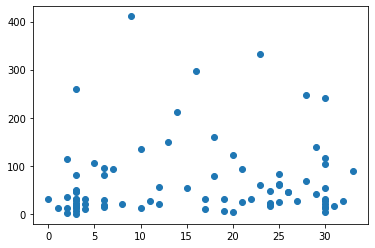

In [137]:
plt.scatter(df2015[['state']],df2015['2014_murders'])

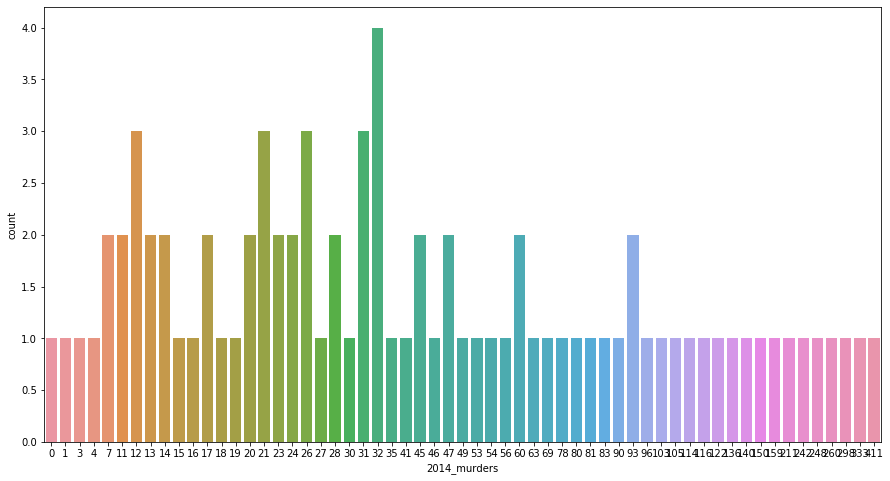

In [140]:
plt.figure(figsize=(15,8))
sns.countplot(df2015['2014_murders'])

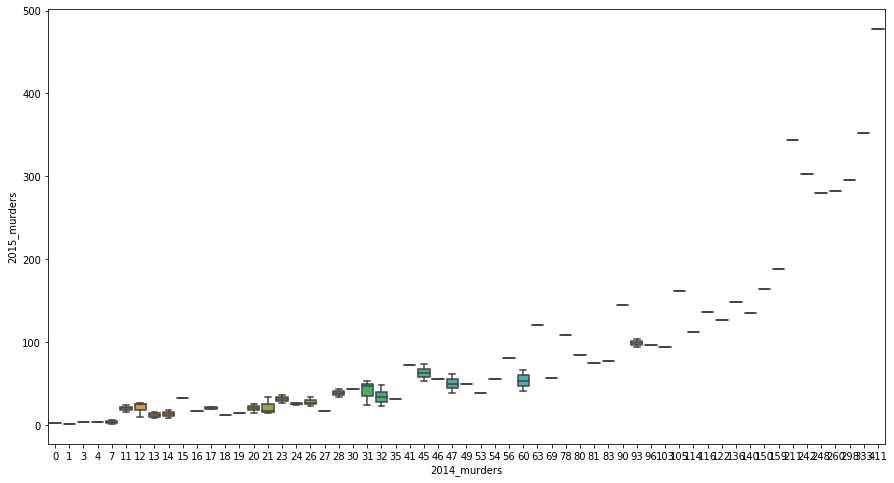

In [142]:
plt.figure(figsize=(15,8))
sns.boxplot(x='2014_murders',y='2015_murders',data=df2015)

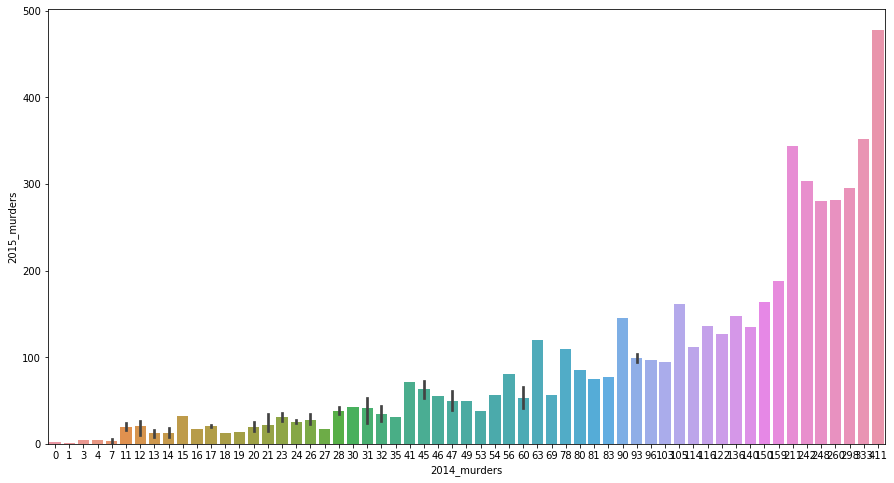

In [145]:
plt.figure(figsize=(15,8))
sns.barplot(x='2014_murders',y='2015_murders',data=df2015)

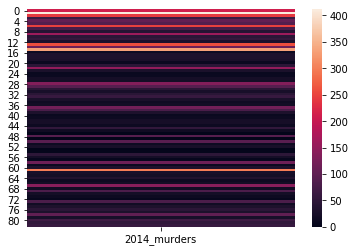

In [148]:
sns.heatmap(df2015[['2014_murders']])

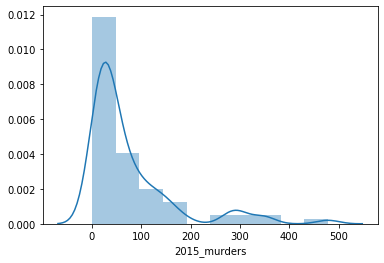

In [150]:
sns.distplot(df2015['2015_murders'],bins=10)

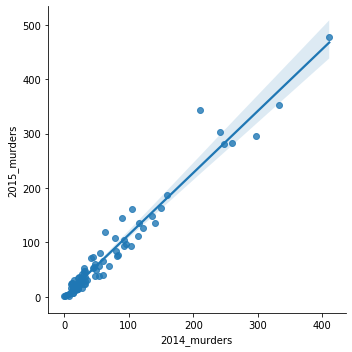

In [151]:
sns.lmplot(x='2014_murders',y='2015_murders',data=df2015)

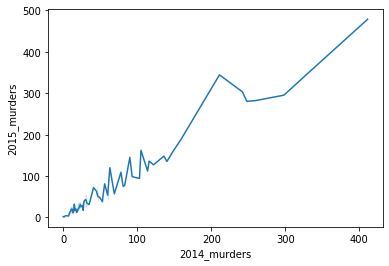

In [154]:
sns.lineplot(x='2014_murders',y='2015_murders',data=df2015)

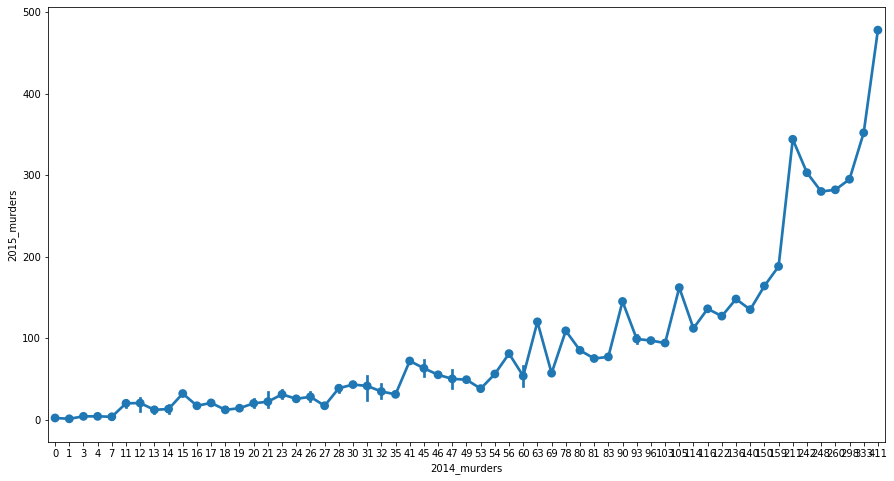

In [157]:
plt.figure(figsize=(15,8))
sns.pointplot(x='2014_murders',y='2015_murders',data=df2015)

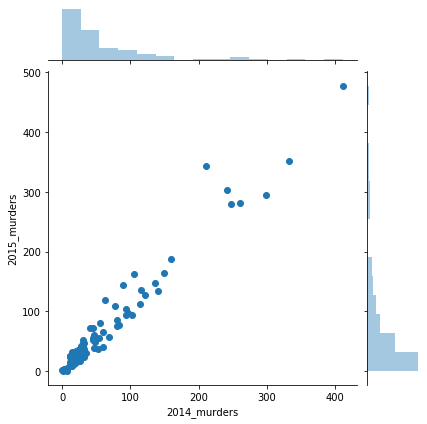

In [158]:
sns.jointplot(x='2014_murders',y='2015_murders',data=df2015)

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
df2015.columns

Index(['city', 'state', '2014_murders', '2015_murders', 'change',
       'murders_2020'],
      dtype='object')

In [166]:
scal=MinMaxScaler()
feat=[ 'state', '2014_murders', '2015_murders', 'change',
       'murders_2020']
df2015[feat]=scal.fit_transform(df2015[feat])
df2015

,city,state,2014_murders,2015_murders,change,murders_2020
0,Baltimore,0.424242,0.513382,0.719078,1.000000,0.0
1,Chicago,0.272727,1.000000,1.000000,0.565789,0.0
2,Houston,0.909091,0.588808,0.633124,0.526316,0.0
3,Cleveland,0.757576,0.153285,0.249476,0.500000,0.0
4,Washington,0.151515,0.255474,0.337526,0.500000,0.0
...,...,...,...,...,...,...
78,San Antonio,0.909091,0.250608,0.194969,0.065789,0.0
79,Corpus Christi,0.909091,0.065693,0.033543,0.059211,0.0
80,Pittsburgh,0.848485,0.167883,0.117400,0.046053,0.0
81,Boston,0.454545,0.128954,0.077568,0.026316,0.0


In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
std=StandardScaler()
feat=['state', '2014_murders', '2015_murders', 'change',
       'murders_2020']
df2015[feat]=std.fit_transform(df2015[feat])
df2015

,city,state,2014_murders,2015_murders,change,murders_2020
0,Baltimore,-0.132868,1.849560,2.946529,5.673432,0.0
1,Chicago,-0.596232,4.396233,4.416951,2.635698,0.0
2,Houston,1.349895,2.244294,2.496624,2.359540,0.0
3,Cleveland,0.886532,-0.034978,0.488510,2.175435,0.0
4,Washington,-0.966923,0.499823,0.949389,2.175435,0.0
...,...,...,...,...,...,...
78,San Antonio,1.349895,0.474356,0.203204,-0.862300,0.0
79,Corpus Christi,1.349895,-0.493380,-0.641740,-0.908326,0.0
80,Pittsburgh,1.164550,0.041422,-0.202808,-1.000378,0.0
81,Boston,-0.040195,-0.162312,-0.411300,-1.138457,0.0


In [169]:
import sweetviz as sv

In [171]:
data=sv.analyze(df2015)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [172]:
from IPython.display import IFrame

In [177]:
IFrame(src='Analyze.html',width=1000,height=600)